# Innlevering av prosjektoppgave våren 2025
## Aksel Minsaas


### Del a)

Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1 i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’,data i kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’. Merk: filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leser supporthistorikken inn i en Pandas DataFrame
data = pd.read_excel('support_uke_24.xlsx')

# Henter hver kolonne og lagrer de i egne Series med tilhørende variabelnavn
u_dag = data['Ukedag'].to_numpy()
kl_slett = data['Klokkeslett'].to_numpy()
varighet = data['Varighet'].to_numpy()
score = data['Tilfredshet'].to_numpy()



### Del b)

Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet visualiseres ved bruk av et søylediagram (stolpediagram).

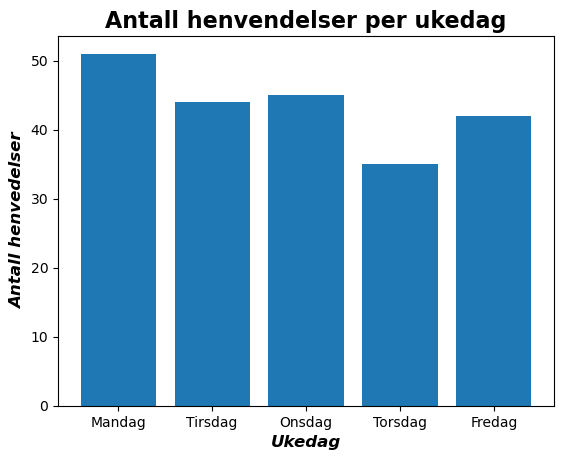

In [2]:
# Konverterer til Pandas Series å å benytte .value_counts(). 
henvendelser_per_ukedag = pd.Series(u_dag).value_counts()

# Definerer rekkefølge på dagene 
ukedager = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]

# Setter riktig sorteringsrekkefølge
henvendelser_per_ukedag = henvendelser_per_ukedag.reindex(ukedager)

# Plotter oversikten og formaterer søylediagrammet etter ønske
plt.bar(henvendelser_per_ukedag.index, henvendelser_per_ukedag.values)
plt.title('Antall henvendelser per ukedag', fontsize=16, fontweight='bold')
plt.xlabel('Ukedag', fontsize=12, fontweight='bold', fontstyle='italic')
plt.ylabel('Antall henvedelser', fontsize=12, fontweight='bold', fontstyle='italic')
plt.show()


### Del c)

Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24. Svaret skrives til skjerm med informativ tekst.


In [3]:
# Finner den korteste og lengste samtalen og lagrer de i egne variabler
korteste_samtale = varighet.min()
lengste_samtale = varighet.max()

# Skriver resultatet til skjerm
print(f'Den korteste samtalen som ble gjennomført i uke 24 varte i {korteste_samtale} minutter. Den lengste samtalen varte i hele {lengste_samtale} minutter.')

Den korteste samtalen som ble gjennomført i uke 24 varte i 00:00:59 minutter. Den lengste samtalen varte i hele 00:11:28 minutter.


### Del d)

Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle henvendelser i uke 24.

In [4]:
# Konvertere varighet til timedelta
varighet_timedelta = pd.to_timedelta(varighet)

# Konverterer varigheten til sekunder og regner ut snittet
gjennomsnittlig_samtale = pd.Series(varighet_timedelta.total_seconds()).mean()

# Skriver ut svaret i hele sekunder og konverterer også svaret til minutter med 2 desimaler.
print(f'Gjennomsnittlig samtaletid for alle henvendelser er på {gjennomsnittlig_samtale:.0f} sekunder. Det tilsvarer {gjennomsnittlig_samtale/60:.2f} minutter.')


Gjennomsnittlig samtaletid for alle henvendelser er på 400 sekunder. Det tilsvarer 6.67 minutter.


### Del e)

Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).

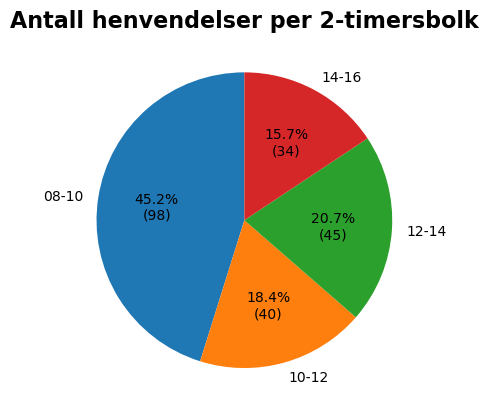

In [ ]:
# Konverterer "Klokkeslett" til datetime-format
kl_slett_datetime = pd.to_datetime(pd.Series(kl_slett), format='%H:%M:%S')

# Henter kun timene fra klokkeslettene
tids_bolk = kl_slett_datetime.dt.hour

# Funksjon for å kategorisere tidspunktene
def kategoriser_tid(time):
    if 8 <= time and time < 10:
        return '08-10'
    elif 10 <= time and time < 12:
        return '10-12'
    elif 12 <= time and time < 14:
        return '12-14'
    elif 14 <= time and time < 16:
        return '14-16'
    
# Legger til en ny kolonne for kategori i tids_bolk
tids_bolk_kategorisert = tids_bolk.apply(kategoriser_tid)

# Teller antall henvendelser per tidsbolk
henvendelser_per_tidsrom = tids_bolk_kategorisert.value_counts().sort_index()

# Plotter sektordiagram
plt.pie(
    henvendelser_per_tidsrom, 
    labels=henvendelser_per_tidsrom.index, 
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * sum(henvendelser_per_tidsrom))})",
    startangle=90
)
plt.title("Antall henvendelser per 2-timersbolk", fontsize=16, fontweight='bold')
plt.show()


### Del f)

Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og 10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net Promoter Score).

Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk: Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

In [8]:
# Fjerner henvendelser uten score
score_ryddet = pd.Series(score).dropna()

# Funksjon for å kategorisere score
def kategoriser_score(x):
    if 1 <= x and x <= 6:
        return 'Negativ'
    elif 6 < x and x <= 8:
        return 'Nøytral'
    elif 8 < x and x <= 10:
        return 'Positiv'

# Bruker funksjonen for å legge til eny kolonne med kategori for hver score
score_ryddet_kategori = score_ryddet.apply(kategoriser_score)

# Teller antall i hver kategori
score_ryddet_kategori = score_ryddet_kategori.value_counts().sort_index()

# Lager variabler for antall av de ulike gruppene. Lager også variabel for å beregne NPS-score
total_antall_med_score = score_ryddet.count()

positiv = score_ryddet_kategori.get('Positiv')
negativ = score_ryddet_kategori.get('Negativ')
nøytral = score_ryddet_kategori.get('Nøytral')

nps_score = ((positiv/total_antall_med_score) - (negativ/total_antall_med_score)) * 100 # Tolker det som at NPS-score oppgis i heltall 

# Skriver svaret til skjerm. Runder av svaret til nærmeste heltall.
print(f'NPS-score for MORSE i uke 24 er på {round(nps_score)}.')




NPS-score for MORSE i uke 24 er på 42.
